# [Darshan-LDMS Integrator](https://ovis-hpc.readthedocs.io/en/latest/ldms/ldms-streams.html#darshans)

### A **framework** that integrates Darshan + LDMS to provide low-latency monitoring of I/O events during runtime. 

- **[Darshan](https://www.mcs.anl.gov/research/projects/darshan/)**: a lightweight I/O characterization tool used to capture I/O access information in memory during the execution of HPC applications. After a job running with Darshan finishes executing, Darshan merges I/O data from all processes and generates a profile document and, optionally, also a trace file.

- **[Lightweight Distributed Metric Service (LDMS)](https://ovis-hpc.readthedocs.io/en/latest/ldms/ldms-quickstart.html)**: a low-overhead production monitoring system for HPC machines. It has the capability to collect, transport, aggregate and store timeseries data during runtime. Example of system performance metrics collected are CPU, memory, power, and storage metrics.

![Darshan-LDMS Integration](newdarshanconnector.jpg)

### Main benefits

- Data is monitored and recorded continuously throughout the execution of the program (as opposed to aggregation at the end of execution only)
- Captures **absolute time-series data** with high precision: can be used to correlate application-specific events with system utilization activities
- Captures read/write/**close/open/flushes**
- Captures POSIX, MPI-IO and stdio, distinguishing between **STDIN/STDOUT/STDERR** 
- Stores all application processes in **JSON or CSV** format, which facilitates processing by most data analysis tools
- No changes in the code necessary

### Example of CSV file collected

It captures 25 columns with information about the job, I/O and timestamp:

In [5]:
!head -n5 ./darshan-ldms-output/19047177-IOR_pscratch_32_none.csv

uid,exe,job_id,rank,ProducerName,file,record_id,module,type,max_byte,switches,flushes,cnt,op,pt_sel,irreg_hslab,reg_hslab,ndims,npoints,off,len,start,dur,total,timestamp
12345,/projects/ovis/darshanConnector/apps/rhel9.7/ior/build/bin/ior,19047177,0,n1119,<STDIN>,9.22337E+18,STDIO,MET,-1,-1,-1,1,open,-1,-1,-1,-1,-1,-1,-1,0,0,0,1713585247.463272
12345,/projects/ovis/darshanConnector/apps/rhel9.7/ior/build/bin/ior,19047177,0,n1119,<STDOUT>,9.22337E+18,STDIO,MET,-1,-1,-1,1,open,-1,-1,-1,-1,-1,-1,-1,0,0,0,1713585247.463272
12345,/projects/ovis/darshanConnector/apps/rhel9.7/ior/build/bin/ior,19047177,0,n1119,<STDERR>,7.23826E+18,STDIO,MET,-1,-1,-1,1,open,-1,-1,-1,-1,-1,-1,-1,0,0,0,1713585247.463272
12345,N/A,19047177,0,n1119,N/A,9.22337E+18,STDIO,MOD,51,-1,0,1,write,-1,-1,-1,-1,-1,0,52,0.067659,0.000004,0.000004,1713585247.530934


- Documentation: https://ovis-hpc.readthedocs.io/en/latest/ldms/ldms-streams.html#darshan
- Available in Darshan>=3.4.5: https://www.mcs.anl.gov/research/projects/darshan/download/
- Cite: *S. Walton, O. Aaziz, A. L. V. Solórzano and B. Schwaller, ["LDMS Darshan Connector: For Run Time Diagnosis of HPC Application I/O Performance"](https://ieeexplore.ieee.org/abstract/document/9912673), 2022 HPCMASPA Workshop, IEEE International Conference on Cluster Computing (CLUSTER), Heidelberg, Germany, 2022*

# Videos tutorial 

- Darshan-LDMS introduction and examples [here.](x)
- IOR Demostration [here.](https://drive.google.com/file/d/13KTiYS-uq81jH0zdSaCA8_z6Ql-DV-uI/view?usp=sharing) We showcase running an IOR application on a Sandia HPC machine, with the collected I/O data being visualized in real-time on a Grafana dashboard.
- Installation and collection in an AWS cloud instance for [single node](https://drive.google.com/file/d/1xFmOxJpRhOOWyEAMkv6fxEGIFoTA4_YZ/view?usp=sharing) and [multi-node.](https://drive.google.com/file/d/1kucLEIjtf3sB74HQ26iXd71TRH37eAOQ/view?usp=sharing)

# Use cases:

## IOR

LDMS-Darshan CSV file from an execution of [IOR benchmark](https://github.com/hpc/ior) using 36 ranks, for 2 tasks (iterations), block size of 16MB, and transfer size of 4MB, for 32 segments. Lustre file system running in the Eclipse system:

*$ ./ior -i 2 -b 16m -t 4m -s 32 -F -C -e -k -o /pscratch/user/iorTest/darshan*

Multiple iterations

## IOR with stressors

Absolute timestamps of individual I/O events can also be used to perform I/O analysis and identify bottlenecks at a deeper level, correlating with other system usage data.




In [10]:
!python --version 
!pip --version
!pip install numpy pandas matplotlib

5529.57s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Python 3.8.10


5535.22s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


/bin/pip:6: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import load_entry_point
pip 20.0.2 from /usr/lib/python3/dist-packages/pip (python 3.8)


5541.50s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


/bin/pip:6: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import load_entry_point


In [18]:
!python main.py -input "./darshan-ldms-output/19047177-IOR_pscratch_32_none.csv" -outpath "./darshan-ldms-output/"

5883.14s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Execution time: 0.8473925590515137 seconds


### Output - Progress Rate Summary:

In [19]:
!cat ./darshan-ldms-output/19047177-IOR_pscratch_32_none.txt

5892.62s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


---------------------------------------
JOB CHARACTERISTICS:
---------------------------------------
Job ID: 19047177
36 Rank (s): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
1 Node (s): ['n1119']
User ID: [12345]
Directory: ['/projects/ovis/darshanConnector/apps/rhel9.7/ior/build/bin/ior' 'N/A']
Modules collected: ['STDIO' 'POSIX']
Module events (MOD): 18713
Meta events (MET): 147
---------------------------------------
I/O OPERATIONS:
---------------------------------------
Total I/O makespan: 9.29758 seconds
Cumulative I/O duration: 200.57687 seconds
Bandwidth (MiB/second): 7929.8056
IOPS: 2028.48483 

Duration reads: 1.1035 seconds
Duration writes: 7.2238 seconds
Duration opens: 0.9484 seconds
Duration closes: 1.5842 seconds

# of reads:  9216
Cumulative I/O duration: 29.94
Total bytes: 36864 MiB
Min data size per rank: 1024 MiB
Max data size per rank: 1024 MiB

# of writes:  9353
Cumulative 

### Visualizations

In [20]:
!python analysis.py -input "./darshan-ldms-output/19047177-IOR_pscratch_32_none.csv" -outpath "./darshan-ldms-output/"

6043.21s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Figure(800x350)
analysis.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bw'] = np.where(df['dur'] != 0, df['len'] / (df['dur'] * 2**20), 0)
Figure(640x480)
Figure(800x350)
Figure(1800x500)
Execution time: 11.782156944274902 seconds


## Comparing different executions, same experiment

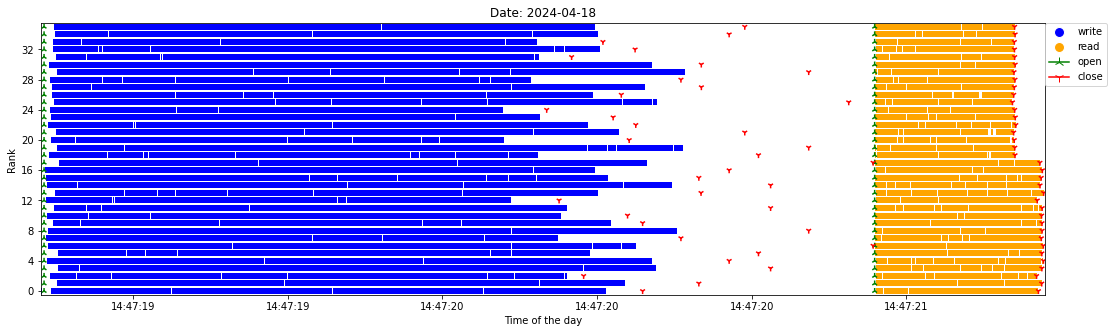

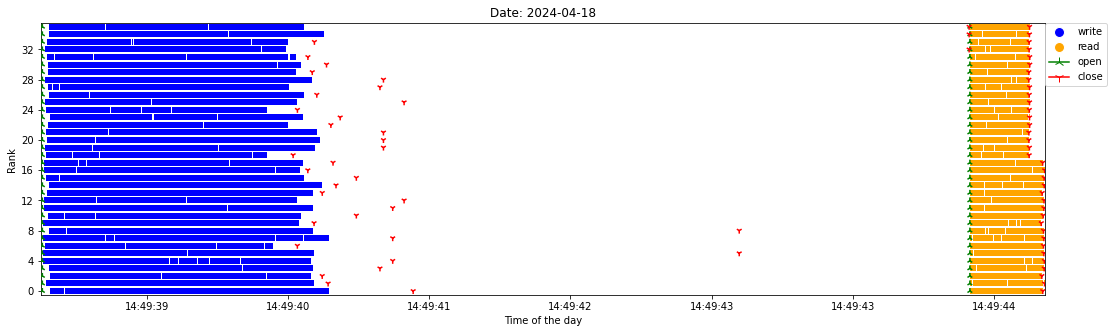

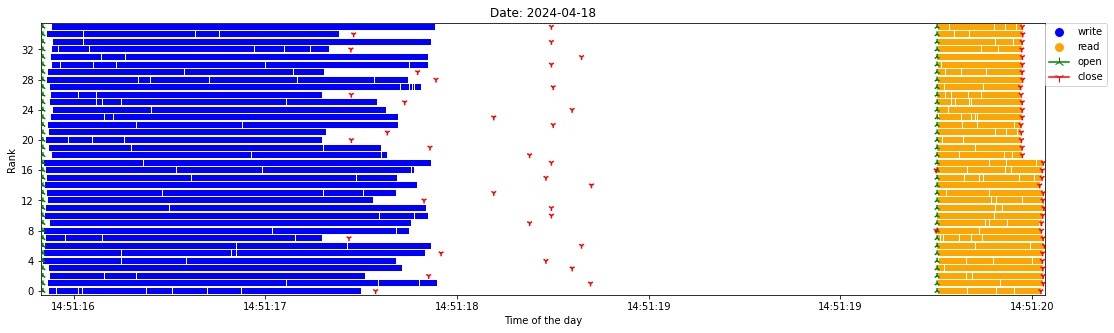

In [28]:
INPUTFILE1="./darshan-ldms-output/19040551-IOR_pscratch_32_none.csv"
INPUTFILE2="./darshan-ldms-output/19040564-IOR_pscratch_32_none.csv"
INPUTFILE3="./darshan-ldms-output/19040582-IOR_pscratch_32_none.csv"

# Read file and generate visualizations
def generate_visualizations(df, filepath): 
    plot_temporal_points(df.copy())
    # io_straggler(df)

df_all = pd.read_csv(INPUTFILE1, engine="pyarrow")
main(INPUTFILE1, FILEPATH)
generate_visualizations(df_all, FILEPATH)   
df_all = pd.read_csv(INPUTFILE2, engine="pyarrow")
main(INPUTFILE2, FILEPATH)
generate_visualizations(df_all, FILEPATH)   
df_all = pd.read_csv(INPUTFILE3, engine="pyarrow")
main(INPUTFILE3, FILEPATH)
generate_visualizations(df_all, FILEPATH)   

***
_In collaboration between:_

_- Northeastern University: Ana Solorzano, Rohan Basu Roy, Devesh Tiwari_

_- Sandia National Laboratories: Sara Walton, Benjamin Schwaller, Jim M. Brandt_